# MMD Simulations

We design a data generating process for staggered adoption and drop out missingness patterns. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
N, T, n, d = 500, 200, 12, 1

In [18]:
Data = np.zeros( (N, T, n, d) )
true_Mean = np.zeros( (N, T, d) )
true_Cov = np.zeros( (N, T, d, d) )

u_1 = np.random.uniform(-5, 5, N)
u_2 = np.random.uniform(0.2, 5, N)

v_1 = np.random.uniform(-5, 5, T)
v_2 = np.random.uniform(0.5, 6, T)

# even_ones = np.repeat([0, 1], d/2)
# odd_ones = np.repeat([1, 0], d/2)

for i in range(N) : 
    for t in range(T) : 
        m_it = np.array([u_1[i]*v_1[t]])
        c_it = np.diag(np.array([(u_2[i]*v_2[t]*(0.5))]))
        print(m_it)
        print(c_it)
        true_Mean[i, t, :] = m_it
        true_Cov[i, t, :, :] = c_it
        dat_mat = np.random.multivariate_normal(m_it, c_it, size = n)
        Data[i, t, :, :] = dat_mat

[-4.09928309]
[[7.61668602]]
[-5.19508595]
[[7.92554422]]
[5.19551482]
[[5.45269051]]
[0.33101648]
[[3.03949692]]
[-4.72719813]
[[6.16600451]]
[4.34179765]
[[8.88170675]]
[-5.15298915]
[[10.82886319]]
[-0.03810854]
[[2.59550859]]
[-4.01325716]
[[4.09767905]]
[2.09341173]
[[1.60352315]]
[2.66655225]
[[1.74508324]]
[3.01149671]
[[3.95457977]]
[-0.10203851]
[[3.65696061]]
[-4.4793443]
[[11.00813735]]
[2.33197018]
[[6.44659774]]
[4.70377033]
[[6.96919665]]
[0.45251132]
[[2.87712033]]
[5.31960853]
[[3.84100745]]
[5.48508378]
[[9.72368609]]
[4.39556415]
[[4.11467047]]
[3.56592844]
[[10.52437924]]
[-3.43084339]
[[1.5320003]]
[-0.07623324]
[[3.48354986]]
[-0.76868865]
[[1.87924534]]
[3.86378142]
[[1.08960754]]
[-4.97878911]
[[7.52496074]]
[4.14129992]
[[1.33762738]]
[-0.26560552]
[[3.61864849]]
[0.57366364]
[[9.57615065]]
[4.20188835]
[[8.49026736]]
[-0.35554378]
[[10.93702299]]
[-0.88243901]
[[5.78357221]]
[3.09563533]
[[1.76636178]]
[5.48060277]
[[8.09802304]]
[-0.26928447]
[[5.18058657]]
[3

In [19]:
expit = lambda x : np.exp(x) / (1 + np.exp(x))
expit

<function __main__.<lambda>(x)>

In [22]:
expit(sum(beta * u_1))

np.float64(0.9999871736101077)

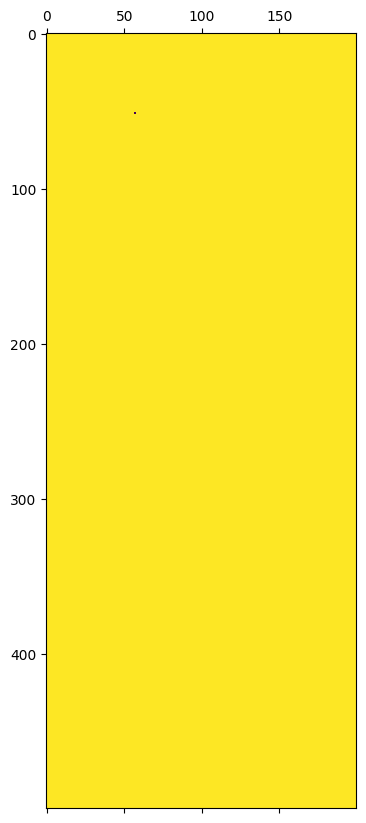

In [20]:
beta = np.repeat((-0.1, 0.2), N/2)
Masking = np.reshape(np.random.binomial( 1, expit(sum(beta * u_1)), (N*T) ), (N, T))
plt.matshow(Masking)

In [61]:
def gendata(N, T, n, d, eps_N, eps_t, p, missing_pattern, num_groups):
  """
  Generate data with missing pattern designated by missing_pattern, r = 3 case
  """
  ## Data Matrix (N * T * n * d)
  Data = np.zeros( (N, T, n, d) )

  u_1 = np.random.uniform(-1, 1, N)
  u_2 = np.random.uniform(0.2, 7, N)
  u_3 = np.random.uniform(0, 1, N)

  v_1 = np.random.uniform(-2, 2, T)
  v_2 = np.random.uniform(0.5, 8, T)
  v_3 = np.random.uniform(0, 1, T)

  for i in range(N) : 
    for t in range(T) : 
        m_u = np.array([u_1[i]])
        m_v = np.array([v_1[t]])
        c_u = np.diag(np.array([u_2[i]*(0.5)]))
        c_v = np.diag(np.array([v_2[t]*(0.5)]))
        # add in r2 (i.e. not mixture)
        mix_weight = u_3[i]/(u_3[i] + v_3[t])
        dat_mat = np.zeros( (n, d) )
        for k in range(n) : 
            comp = np.random.binomial(1, mix_weight)
            if comp == 1 :
                dat_mat[k, :] = np.random.multivariate_normal(m_u, c_u)
            if comp == 0 : 
                dat_mat[k, :] = np.random.multivariate_normal(m_v, c_v)
        Data[i, t, :, :] = dat_mat

  mask = np.zeros((N, T))
  expit = lambda x : np.exp(x)/(1 + np.exp(x))
  beta = np.repeat((-0.1, 0.2), N/2)


  if missing_pattern == "staggered adoption":
    adoption_points = np.arange(0, T + 1)
    #np.array([0, T//4, T//2, 3 * T // 4, np.inf])
    partition_points = np.random.choice(range(1, N), size=num_groups - 1, replace=False)
    partition_points.sort()
    prev = 0
    group_inds = []
    for i in range(num_groups - 1):
       group_inds.append(np.arange(prev, partition_points[i] + 1))
       prev = partition_points[i] + 1
    group_inds.append(np.arange(prev, N))
    start_points = np.random.choice(adoption_points, size = num_groups, replace = True, p = np.full([T + 1], 1 / (T + 1)))
    print(start_points)
    for j, inds in enumerate(group_inds):
       sp_j = start_points[j]
       if sp_j != T:
          # this is mnar non-positive within adopted period
          #mask[inds, sp_j:] = np.random.binomial(1, expit(sum(beta * u_1)), (len(inds), int(T - sp_j)))
          # this is mcar
          mask[inds, sp_j:] = np.random.binomial(1, p, (len(inds), int(T - sp_j)))
  elif missing_pattern == "dropout":
    adoption_points = np.arange(0, T + 1)
    #np.array([0, T//4, T//2, 3 * T // 4, np.inf])
    partition_points = np.random.choice(range(1, N), size=num_groups - 1, replace=False)
    partition_points.sort()
    prev = 0
    group_inds = []
    for i in range(num_groups - 1):
       group_inds.append(np.arange(prev, partition_points[i] + 1))
       prev = partition_points[i] + 1
    group_inds.append(np.arange(prev, N))
    start_points = np.random.choice(adoption_points, size = num_groups, replace = True, p = np.full([T + 1], 1 / (T + 1)))
    # think about how to do the dropout part here
    for j, inds in enumerate(group_inds):
       sp_j = start_points[j]
       if sp_j != T:
          # this is mnar non-positive within adopted period
          #mask[inds, sp_j:] = np.random.binomial(1, expit(sum(beta * u_1)), (len(inds), int(T - sp_j)))
          # this is mcar
          mask[inds, sp_j:] = np.random.binomial(1, p, (len(inds), int(T - sp_j)))
  return Data, mask, group_inds



In [62]:
D, M, ginds = gendata(100, 200, 12, 1, 0.1, 0.1, 0.5, "staggered adoption", 20)

[122  16 139 108 189 143  40 163  48 181 110  52 148 119   8  51 162  88
   3  55]


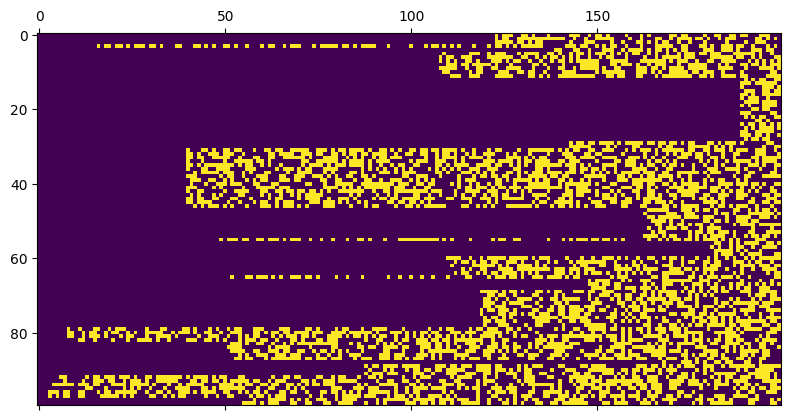

In [63]:
plt.matshow(M)

Staggered adoption

In [130]:
def expit(x):
    return np.exp(x)/(1 + np.exp(x))

def gendata_s_adopt(N, T, n, d, prop_type = "ind") : 
    """ 
    Generates Gaussian data, with latent dimension r = 2

    required : N, d are both EVEN positive integers
    """

    ## Data Matrix (N * T * n * d)
    Data = np.zeros( (N, T, n, d) )
    true_Mean = np.zeros( (N, T, d) )
    true_Cov = np.zeros( (N, T, d, d) )

    u_1 = np.random.uniform(-2, 5, N)
    u_2 = np.random.uniform(-0.2, 5, N)

    v_1 = np.random.uniform(-5, 5, T)
    v_2 = np.random.uniform(0.5, 6, T)

    for i in range(N) : 
        for t in range(T) : 
            m_it = np.array([u_1[i]*v_1[t]])
            c_it = np.diag(np.array([(u_2[i]*v_2[t]*(0.5))]))
            true_Mean[i, t, :] = m_it
            true_Cov[i, t, :, :] = c_it
            dat_mat = np.random.multivariate_normal(m_it, c_it, size = n)
            Data[i, t, :, :] = dat_mat
    
    Masking = np.zeros( (N, T) )

    g1_inds = np.arange(0, N // 3)
    g2_inds = np.arange(N // 3, 2 * N // 3)
    g3_inds = np.arange(2 * N // 3, N)

    beta_0_g1 = 0.2
    beta_1_g1 = np.array([0.1, -0.4])

    beta_0_g2 = 0.4
    beta_1_g2 = np.array([-0.5, 0.3])
    p_tilde_g1 = np.zeros([len(g1_inds)])
    p_tilde_g2 = np.zeros([len(g2_inds)])


    
    if prop_type == "ind":
        for i in g1_inds:
            p_tilde_g1[i] = expit(beta_0_g1 + beta_1_g1[0] * u_1[i] + beta_1_g1[1] * u_2[i])
            p_tilde_g2[i] = expit(beta_0_g2 + beta_1_g2[0] * u_1[g2_inds[i]] + beta_1_g2[1] * u_2[g2_inds[i]])
    elif prop_type == "group":
        group_betas_u1_g1 = np.random.uniform(-0.3, 0.4, len(g1_inds))
        group_betas_u2_g1 = np.random.uniform(-0.2, 0.2, len(g1_inds))

        group_betas_u1_g2 = np.random.uniform(-0.3, 0.4, len(g2_inds))
        group_betas_u2_g2 = np.random.uniform(-0.2, 0.2, len(g2_inds))
        
        p_tilde_group_g1 = expit(beta_0_g1 + (group_betas_u1_g1 @ u_1[g1_inds]) + (group_betas_u2_g1 @ u_2[g1_inds]))
        p_tilde_group_g2 = expit(beta_0_g2 + (group_betas_u1_g2 @ u_1[g2_inds]) + (group_betas_u2_g2 @ u_2[g2_inds]))
        print(p_tilde_group_g1)
        print(p_tilde_group_g2)
        p_tilde_g1 = np.full([len(g1_inds)], p_tilde_group_g1)
        p_tilde_g2 = np.full([len(g2_inds)], p_tilde_group_g2)
        #sum_g1 += beta_1_g1 * u_1[i] + 
    #full_p_g1 = np.full([len(g1_inds), T], p_tilde_ind_g1)
    #full_p_g2 = np.full([len(g2_inds), T], p_tilde_ind_g2) 
    full_p_g1 = np.tile(p_tilde_g1[:,None].T, (T // 2, 1)).T
    full_p_g2 = np.tile(p_tilde_g2[:, None].T, (T // 2, 1)).T
    
    A_tilde_g1 = np.random.binomial(1, full_p_g1, (len(g1_inds), T // 2))
    A_tilde_g2 = np.random.binomial(1, full_p_g2, (len(g2_inds), T // 2))

    A_g1 = np.ones([len(g1_inds), T])
    A_g2 = np.ones([len(g2_inds), T])
    for i in range(len(g1_inds)):
        tau_g1 = np.nonzero(A_tilde_g1[i] == 1)[0][0] + (T // 2)
        tau_g2 = np.nonzero(A_tilde_g2[i] == 1)[0][0] + (T // 2)
        A_g1[i, tau_g1:] = 0
        A_g2[i, tau_g2:] = 0

    A_g3 = np.ones([len(g3_inds), T])

    Masking = np.zeros([N, T])
    Masking[g1_inds] = A_g1
    Masking[g2_inds] = A_g2
    Masking[g3_inds] = A_g3

    return(Data, Masking, true_Mean, true_Cov)

In [131]:
D, M , _, _ = gendata_s_adopt(90, 100, 12, 1, prop_type = "group")

C:\Users\Caleb\AppData\Local\Temp\ipykernel_17640\2335761133.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dat_mat = np.random.multivariate_normal(m_it, c_it, size = n)


0.4111834956157768
0.6004249138540888


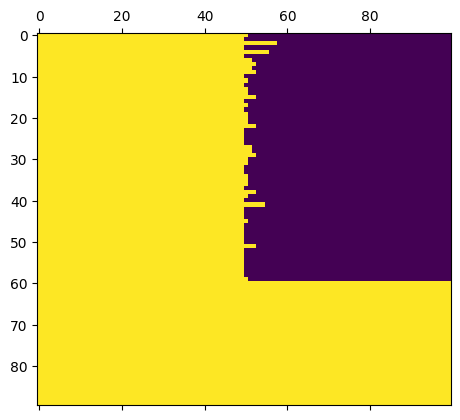

In [132]:
plt.matshow(M)

In [148]:
def expit(x):
    return np.exp(x)/(1 + np.exp(x))

def gendata_rollout(N, T, n, d) : 
    """ 
    Generates Gaussian data, with latent dimension r = 2

    required : N, d are both EVEN positive integers
    """

    ## Data Matrix (N * T * n * d)
    Data = np.zeros( (N, T, n, d) )
    true_Mean = np.zeros( (N, T, d) )
    true_Cov = np.zeros( (N, T, d, d) )

    u_1 = np.random.uniform(-2, 5, N)
    u_2 = np.random.uniform(-0.2, 5, N)

    v_1 = np.random.uniform(-5, 5, T)
    v_2 = np.random.uniform(0.5, 6, T)

    for i in range(N) : 
        for t in range(T) : 
            m_it = np.array([u_1[i]*v_1[t]])
            c_it = np.diag(np.array([(u_2[i]*v_2[t]*(0.5))]))
            true_Mean[i, t, :] = m_it
            true_Cov[i, t, :, :] = c_it
            dat_mat = np.random.multivariate_normal(m_it, c_it, size = n)
            Data[i, t, :, :] = dat_mat
    
    Masking = np.zeros( (N, T) )

    g1_inds = np.arange(0, N // 3)
    g2_inds = np.arange(N // 3, 2 * N // 3)
    g3_inds = np.arange(2 * N // 3, N)

    beta_0_g1 = 0.2
    beta_1_g1 = np.array([0.1, -0.4])

    beta_0_g2 = 0.4
    beta_1_g2 = np.array([-0.5, 0.3])

    beta_0_g3 = 0.1
    beta_1_g3 = np.array([0.3, -0.2])

    p_tilde_g1 = np.zeros([len(g1_inds), T // 2])
    p_tilde_g2 = np.zeros([len(g2_inds), T // 2])
    p_tilde_g3 = np.zeros([len(g3_inds), T // 2])
    dr = np.array([0.05, 0.10, 0.02])
    p_lb = np.array([0.01, 0.2, 0.5])
    for i in range(len(g1_inds)):
        for t in range(len(g2_inds)):
            p_tilde_g1[i, t] = expit(beta_0_g1 + beta_1_g1[0] * u_1[i] + beta_1_g1[1] * u_2[i] - (t * dr[0]))
            p_tilde_g2[i, t] = expit(beta_0_g2 + beta_1_g2[0] * u_1[g2_inds[i]] + beta_1_g2[1] * u_2[g2_inds[i]] - (t * dr[1]))
            p_tilde_g3[i, t] = expit(beta_0_g3 + beta_1_g3[0] * u_1[g3_inds[i]] + beta_1_g3[1] * u_2[g3_inds[i]] - (t * dr[2]))
    # full_p_g1 = np.tile(p_tilde_g1[:,None].T, (T // 2, 1)).T
    # full_p_g2 = np.tile(p_tilde_g2[:, None].T, (T // 2, 1)).T
    p_tilde_g1 = np.clip(p_tilde_g1, a_min = p_lb[0], a_max = None)
    p_tilde_g2 = np.clip(p_tilde_g2, a_min = p_lb[1], a_max = None)
    p_tilde_g3 = np.clip(p_tilde_g3, a_min = p_lb[2], a_max = None)

    print(p_tilde_g1)
    print(p_tilde_g2)
    print(p_tilde_g3)
    A_g1 = np.random.binomial(1, p_tilde_g1, (len(g1_inds), T // 2))
    A_g2 = np.random.binomial(1, p_tilde_g2, (len(g2_inds), T // 2))
    A_g3 = np.random.binomial(1, p_tilde_g3, (len(g3_inds), T // 2))

    # A_g1 = np.ones([len(g1_inds), T])
    # A_g2 = np.ones([len(g2_inds), T])
    # for i in range(len(g1_inds)):
    #     tau_g1 = np.nonzero(A_tilde_g1[i] == 1)[0][0] + (T // 2)
    #     tau_g2 = np.nonzero(A_tilde_g2[i] == 1)[0][0] + (T // 2)
    #     A_g1[i, tau_g1:] = 0
    #     A_g2[i, tau_g2:] = 0

    Masking = np.ones([N, T])
    Masking[g1_inds, T // 2 :] = A_g1
    Masking[g2_inds, T // 2 :] = A_g2
    Masking[g3_inds, T // 2 :] = A_g3

    return(Data, Masking, true_Mean, true_Cov)

In [149]:
D, M , _, _ = gendata_rollout(90, 100, 12, 1)

C:\Users\Caleb\AppData\Local\Temp\ipykernel_17640\1497737519.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dat_mat = np.random.multivariate_normal(m_it, c_it, size = n)


[[0.55724026 0.54487126 0.53244664 ... 0.01       0.01       0.01      ]
 [0.28376448 0.27371313 0.26388665 ... 0.01       0.01       0.01      ]
 [0.21103658 0.20283182 0.19486727 ... 0.01       0.01       0.01      ]
 ...
 [0.23062057 0.22186854 0.21335654 ... 0.01       0.01       0.01      ]
 [0.1817122  0.17439553 0.16731322 ... 0.01       0.01       0.01      ]
 [0.1563284  0.14984664 0.14358789 ... 0.01       0.01       0.01      ]]
[[0.63898378 0.61561005 0.59169001 ... 0.2        0.2        0.2       ]
 [0.56124255 0.53648663 0.51154955 ... 0.2        0.2        0.2       ]
 [0.72863778 0.70841989 0.68734203 ... 0.2        0.2        0.2       ]
 ...
 [0.6692027  0.64670372 0.62353533 ... 0.2        0.2        0.2       ]
 [0.43551058 0.4111042  0.38712757 ... 0.2        0.2        0.2       ]
 [0.47196378 0.44713269 0.42256255 ... 0.2        0.2        0.2       ]]
[[0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.50165873 0.5        0.5        ... 

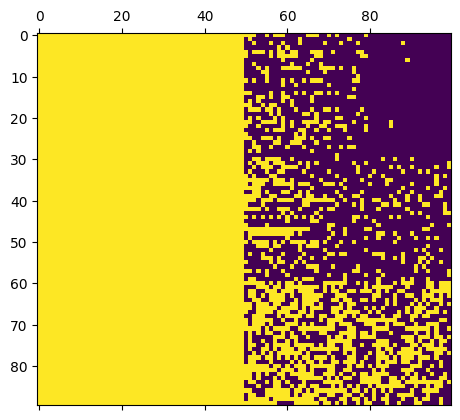

In [150]:
plt.matshow(M)